In [1]:
import numpy as np
import pandas as pd

import pycaret as pc
from pycaret.classification import *

In [2]:
# read and prepare the dataframe:

miccai_3dt1 = pd.read_csv('CSV-Dasets/MICCAI_3DT1.csv')

wmh_3dt1 = pd.read_csv('CSV-Dasets/WMH_3DT1.csv')

lesions = pd.DataFrame()
lesions = lesions.append(miccai_3dt1, ignore_index=True)
lesions = lesions.append(wmh_3dt1, ignore_index=True)

classification = lesions['class']

del lesions['Patient_ID']
del lesions['class']

lesions

original_shape_Elongation  original_shape_Flatness  \
0                     0.407732                 0.290469   
1                     0.888132                 0.386957   
2                     0.534254                 0.354698   
3                     0.853141                 0.567629   
4                     0.436164                 0.356494   
5                     0.432746                 0.350383   
6                     0.525206                 0.305644   
7                     0.545052                 0.231949   
8                     0.363521                 0.269625   
9                     0.941270                 0.408429   
10                    0.581969                 0.330596   
11                    0.616474                 0.488410   
12                    0.330415                 0.175649   
13                    0.711731                 0.473516   
14                    0.239068                 0.186494   
15                    0.589721                 0.306018   
16                    0.332336                 0.207763   
17                    0.718488                 0.539906   
18                    0.472352                 0.415582   
19                    0.573803                 0.454612   
20                    0.595483                 0.304341   
21                    0.665498                 0.418559   
22                    0.379191                 0.327769   
23                    0.532317                 0.432770   
24                    0.686945                 0.412281   
25                    0.532090                 0.360214   
26                    0.611680                 0.455640   
27                    0.593567                 0.356418   
28                    0.580323                 0.369444   
29                    0.423100                 0.318715   
30                    0.516275                 0.298866   
31                    0.480267                 0.311040   
32                    0.668151                 0.633425   
33                    0.697016                 0.398622   
34                    0.726278                 0.598095   
35                    0.622873                 0.360181   
36                    0.840187                 0.718337   
37                    0.489655                 0.381701   
38                    0.425708                 0.363027   
39                    0.491415                 0.339567   
40                    0.378055                 0.315082   
41                    0.748620                 0.721923   
42                    0.247135                 0.115914   
43                    0.812510                 0.498761   
44                    0.266490                 0.179013   
45                    0.300224                 0.230072   
46                    0.256425                 0.118501   
47                    0.826226                 0.601532   
48                    0.427865                 0.359189   
49                    0.755310                 0.436383   
50                    0.661713                 0.446563   
51                    0.843978                 0.536737   
52                    0.369321                 0.328304   
53                    0.815900                 0.538861   
54                    0.895508                 0.423543   
55                    0.875006                 0.629196   
56                    0.465897                 0.417748   
57                    0.628386                 0.498502   
58                    0.593430                 0.355279   
59                    0.487474                 0.305444   
60                    0.825371                 0.542722   
61                    0.489132                 0.391586   
62                    0.701199                 0.444587   
63                    0.584820                 0.339490   
64                    0.275791                 0.182982   
65                    0.417224                 0.378877   
66                    0.538873                 0.270

### Exploratory Data Analysis: Shape Features Correlation

In [3]:
shape_features = list(filter(lambda x: 'shape' in x, lesions.columns))
len(shape_features)
#shape_features

14

In [4]:
non_shape_features = list(filter(lambda x: 'shape' not in x, lesions.columns))
len(non_shape_features)

147

In [5]:
corr_matrix = lesions.corr()
corr_matrix = corr_matrix[non_shape_features]
#del corr_matrix[shape_features]
corr_matrix = corr_matrix[corr_matrix.index.isin(shape_features)]
#type(corr_matrix)

In [6]:
corr_matrix

original_firstorder_10Percentile  \
original_shape_Elongation                                       0.076684   
original_shape_Flatness                                         0.064042   
original_shape_LeastAxisLength                                 -0.220288   
original_shape_MajorAxisLength                                 -0.196382   
original_shape_Maximum2DDiameterColumn                         -0.180358   
original_shape_Maximum2DDiameterRow                            -0.155296   
original_shape_Maximum2DDiameterSlice                          -0.159377   
original_shape_Maximum3DDiameter                               -0.189564   
original_shape_MeshVolume                                      -0.223255   
original_shape_MinorAxisLength                                 -0.161743   
original_shape_Sphericity                                       0.116904   
original_shape_SurfaceArea                                     -0.176574   
original_shape_SurfaceVolumeRatio                               0.188864   
original_shape_VoxelVolume                                     -0.222845   

                                        original_firstorder_90Percentile  \
original_shape_Elongation                                       0.029453   
original_shape_Flatness                                         0.010545   
original_shape_LeastAxisLength                                 -0.131172   
original_shape_MajorAxisLength                                 -0.089525   
original_shape_Maximum2DDiameterColumn                         -0.072984   
original_shape_Maximum2DDiameterRow                            -0.091983   
original_shape_Maximum2DDiameterSlice                          -0.057404   
original_shape_Maximum3DDiameter                               -0.101670   
original_shape_MeshVolume                                      -0.112060   
original_shape_MinorAxisLength                                 -0.082989   
original_shape_Sphericity                                       0.097989   
original_shape_SurfaceArea                                     -0.073988   
original_shape_SurfaceVolumeRatio                               0.027967   
original_shape_VoxelVolume                                     -0.111932   

                                        original_firstorder_Energy  \
original_shape_Elongation                                 0.078586   
original_shape_Flatness                                  -0.089259   
original_shape_LeastAxisLength                            0.783528   
original_shape_MajorAxisLength                            0.729854   
original_shape_Maximum2DDiameterColumn                    0.832699   
original_shape_Maximum2DDiameterRow                       0.765064   
original_shape_Maximum2DDiameterSlice                     0.790751   
original_shape_Maximum3DDiameter                          0.783786   
original_shape_MeshVolume                                 0.904494   
original_shape_MinorAxisLength                            0.882703   
original_shape_Sphericity                                -0.574736   
original_shape_SurfaceArea                                0.935075   
original_shape_SurfaceVolumeRatio                        -0.598416   
original_shape_VoxelVolume                                0.905027   

                                        original_firstorder_Entropy  \
original_shape_Elongation                                 -0.070778   
original_shape_Flatness                                   -0.149747   
original_shape_LeastAxisLength                             0.247164   
original_shape_MajorAxisLength                             0.304738   
original_shape_Maximum2DDiameterColumn                     0.303114   
original_shape_Maximum2DDiameterRow                        0.282345   
original_shape_Maximum2DDiameterSlice                      0.256739   
original_shape_Maximum3DDiameter                           0.301524   
original_shape_MeshVolume                                  0.270114 

#### Identifying and Eliminating shape-correllated features

In [7]:
describe = corr_matrix.describe()
uncorr_feats = [feat for feat in corr_matrix.columns if (describe[feat]['max']<0.5 or describe[feat]['min']>-0.5)]
corr_feats = [feat for feat in corr_matrix.columns if (describe[feat]['max']>0.5 or describe[feat]['min']<-0.5)]
len(uncorr_feats)

105

In [8]:
# Defining the uncorrelated dataset:
lesions_prep = lesions[uncorr_feats]
lesions_prep['lesion_type'] = classification

lesions_prep = lesions_prep.sample(frac=1, random_state=10)
lesions_prep.reset_index(inplace=True)
del lesions_prep['index']
lesions_prep

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                                42.0                              62.0   
1                                45.0                              64.0   
2                                47.0                              63.0   
3                                31.0                              65.0   
4                                32.0                              66.0   
5                                26.0                              56.0   
6                                50.0                              65.0   
7                                49.0                              55.0   
8                                42.0                              61.0   
9                                29.0                              56.0   
10                               39.0                              57.0   
11                               35.0                              74.0   
12                               31.0                              78.0   
13                               43.0                              64.0   
14                               33.0                              60.0   
15                               39.0                              65.0   
16                               27.0                              42.0   
17                               33.0                              63.0   
18                               41.0                              62.0   
19                               27.0                              45.0   
20                               54.0                              74.0   
21                               30.8                              66.0   
22                               39.0                              55.0   
23                               30.0                              55.0   
24                                8.0                              44.0   
25                               38.0                              62.0   
26                               46.0                              64.0   
27                               41.0                              60.0   
28                               40.0                              65.0   
29                               29.0                              47.0   
30                               20.0                              60.0   
31                               42.0                              58.0   
32                               38.0                              61.0   
33                               24.0                              71.0   
34                               41.0                              68.0   
35                               24.0                              73.0   
36                               38.0                              47.0   
37                               31.0                              57.0   
38                               28.0                              64.0   
39                               30.0                              51.0   
40                               51.0                              54.0   
41                               10.0                              52.0   
42                                6.0                              38.0   
43                               46.0                              65.0   
44                               29.0                              54.0   
45                               26.0                              46.0   
46                               37.0                              63.0   
47                               36.0                              57.0   
48                               37.0                              59.0   
49                               26.0                              43.0   
50                               34.0                              62.0   
51                               50.0                              63.0   
52                            

#### Verifying outliers

In [9]:
lesions_prep.describe()

original_firstorder_10Percentile  original_firstorder_90Percentile  \
count                        194.000000                        194.000000   
mean                          35.940206                         59.944845   
std                           10.620414                          8.295445   
min                            6.000000                         38.000000   
25%                           30.000000                         55.000000   
50%                           36.500000                         61.000000   
75%                           42.000000                         65.000000   
max                           67.000000                         83.000000   

       original_firstorder_Entropy  original_firstorder_InterquartileRange  \
count                   194.000000                              194.000000   
mean                      3.380190                               13.452320   
std                       0.597426                                7.161668   
min                       0.887424                                1.000000   
25%                       3.056477                                9.000000   
50%                       3.496608                               12.000000   
75%                       3.771973                               17.000000   
max                       4.499577                               38.000000   

       original_firstorder_Kurtosis  original_firstorder_Maximum  \
count                    194.000000                   194.000000   
mean                       2.891931                    69.412371   
std                        1.121671                     9.495298   
min                        1.334804                    48.000000   
25%                        2.328417                    63.000000   
50%                        2.766496                    69.500000   
75%                        3.258958                    75.000000   
max                       11.894353                    94.000000   

       original_firstorder_MeanAbsoluteDeviation  original_firstorder_Mean  \
count                                 194.000000                194.000000   
mean                                    7.587513                 48.224983   
std                                     3.280591                  8.811708   
min                                     0.927999                 19.430926   
25%                                     5.411143                 43.277942   
50%                                     7.155990                 49.268849   
75%                                     9.342285                 52.751253   
max                                    17.562062                 71.988228   

       original_firstorder_Median  original_firstorder_Minimum  \
count                  194.000000                   194.000000   
mean                    48.672680                    24.273196   
std                      9.850558                    11.238470   
min                     17.000000                     2.000000   
25%                     43.000000                    16.000000   
50%                     49.000000                    23.000000   
75%                     54.000000                    32.000000   
max                     74.000000                    57.000000   

       original_firstorder_Range  \
count                 194.000000   
mean                   45.139175   
std                    15.866875   
min                     6.000000   
25%                    34.000000   
50%                    46.000000   
75%                    55.000000   
max                    84.000000   

       original_firstorder_RobustMeanAbsoluteDeviation  \
count                                       194.000000   
mean                                          5.746304   
std                                           2.822197   
min                                           0.852071   
25%                                           3.897656   
50%                       

In [26]:
setup( lesions_prep, session_id=2021, target='lesion_type', normalize=True, use_gpu=True,
      train_size=0.8, feature_selection=True, fold=5)

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='lesion_type', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('fix_perfect', Remove_100(target='lesion_type')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
                 A

(False,
 <MLUsecase.CLASSIFICATION: 1>,
 '75f9',
 4      0
 187    0
 22     1
 165    0
 99     0
       ..
 109    0
 128    1
 57     0
 85     1
 116    0
 Name: lesion_type, Length: 155, dtype: int32,
 5,
      original_firstorder_10Percentile  original_firstorder_90Percentile  \
 0                                42.0                              62.0   
 1                                45.0                              64.0   
 2                                47.0                              63.0   
 3                                31.0                              65.0   
 4                                32.0                              66.0   
 ..                                ...                               ...   
 189                              43.0                              67.0   
 190                              30.0                              43.0   
 191                              25.0                              61.0   
 192                          

In [27]:
compare_models()

INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr = create_model('lr')

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [32]:
tuned = tune_model(lr, n_iter=20, search_algorithm='grid')

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, round=4, n_iter=20, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=grid, early_stopping=False, early_stopping_max_iters=10, choose_better=False, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=7)

Initiated  . . . . . . . . . . . . . . . . . .                   14:12:49
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .        Logistic Regression

Empty DataFrame
Columns: [Accuracy, AUC, Recall, Prec., F1, Kappa, MCC]
Index: []

INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Logistic Regression
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing GridSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 20000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 3204 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 6004 tasks      | elapsed:  1.0min
ERROR:concurrent.futures:exception calling callback for <Future at 0x2fa3e18ee20 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\Leo\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\Leo\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Leo\anaconda3\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Leo\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Leo\anaconda3\lib\site-packages\joblib\par

KeyboardInterrupt: 

In [30]:
evaluate_model(tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=3.101, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

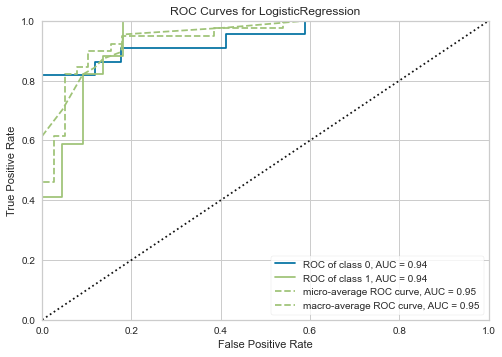

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(tuned)

In [88]:
predict_model(tuned)

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                           0.020349                          0.071024   
1                           0.602783                          0.195223   
2                          -0.950374                         -1.791965   
3                           1.670578                         -0.425773   
4                          -0.367940                         -1.791965   
5                          -0.659157                         -1.667765   
6                          -0.562085                         -0.674172   
7                          -0.076723                          0.567820   
8                           0.602783                          0.567820   
9                           0.505711                         -0.053176   
10                          0.796928                         -0.549973   
11                         -0.270868                          1.064617   
12                          0.408638                          0.319422   
13                         -0.367940                          0.071024   
14                          0.796928                          0.443621   
15                          0.796928                          0.319422   
16                         -1.921097                         -1.233068   
17                          0.214494                         -1.543566   
18                          0.505711                          0.195223   
19                          1.670578                          2.306609   
20                         -0.853302                         -1.916164   
21                         -0.678571                          0.567820   
22                         -0.465012                          0.567820   
23                         -0.173795                         -0.053176   
24                         -0.853302                         -1.667765   
25                          0.117422                         -1.046769   
26                          1.379362                         -0.177375   
27                         -0.659157                         -1.543566   
28                          0.311566                         -0.674172   
29                         -0.076723                          0.443621   
30                         -0.950374                         -2.164562   
31                          0.311566                          0.940418   
32                          0.602783                         -0.301574   
33                         -0.367940                         -0.177375   
34                         -0.950374                         -0.549973   
35                          2.155940                          1.561414   
36                         -0.659157                         -0.798371   
37                          2.835446                          1.809813   
38                          1.088145                          0.195223   
39                          0.117422                          0.692020   
40                         -0.367940                          0.816219   
41                          0.214494                         -0.549973   
42                          0.699855                         -0.301574   
43                          3.029591                          1.934012   
44                         -1.435735                         -1.791965   
45                          0.991072                          0.443621   
46                          0.311566                         -1.543566   
47                         -0.668864                          0.195223   
48                         -0.659157                         -0.549973   
49                          0.311566                          0.195223   
50                         -2.794748                         -1.543566   
51                          0.408638                          1.809813   
52                         -0.562085                         -0.922570   
53      